## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [7]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_train.shape

(50000, 3072)

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.56862745, 0.58039216, 0.61568627, ..., 0.49411765, 0.62745098,
        0.35686275],
       [0.57254902, 0.57254902, 0.57254902, ..., 0.93333333, 0.93333333,
        0.93333333],
       [0.79607843, 0.80784314, 0.81568627, ..., 0.51764706, 0.51372549,
        0.49411765]])

In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train[:1000], y_train[:1000], 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True,
         )

Train on 1000 samples, validate on 10000 samples
Epoch 1/500
1000/1000 [==============================] - 7s 7ms/step - loss: 1.6537 - acc: 0.4340 - val_loss: 1.6896 - val_acc: 0.4116
Epoch 2/500
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6518 - acc: 0.4390 - val_loss: 1.6898 - val_acc: 0.4118
Epoch 3/500
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6508 - acc: 0.4330 - val_loss: 1.6900 - val_acc: 0.4118
Epoch 4/500
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6498 - acc: 0.4350 - val_loss: 1.6901 - val_acc: 0.4120
Epoch 5/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6470 - acc: 0.4390 - val_loss: 1.6903 - val_acc: 0.4118
Epoch 6/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6460 - acc: 0.4300 - val_loss: 1.6903 - val_acc: 0.4110
Epoch 7/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6438 - acc: 0.4320 - val_loss: 1.6903 - val_acc: 0.4113
Epoch 

Epoch 61/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5990 - acc: 0.4530 - val_loss: 1.6951 - val_acc: 0.4066
Epoch 62/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5973 - acc: 0.4550 - val_loss: 1.6949 - val_acc: 0.4075
Epoch 63/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5972 - acc: 0.4520 - val_loss: 1.6951 - val_acc: 0.4063
Epoch 64/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5959 - acc: 0.4550 - val_loss: 1.6951 - val_acc: 0.4061
Epoch 65/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5945 - acc: 0.4560 - val_loss: 1.6952 - val_acc: 0.4060
Epoch 66/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5935 - acc: 0.4540 - val_loss: 1.6951 - val_acc: 0.4071
Epoch 67/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5934 - acc: 0.4510 - val_loss: 1.6953 - val_acc: 0.4064
Epoch 68/500
1000/1000 [========================

1000/1000 [==============================] - 1s 1ms/step - loss: 1.5597 - acc: 0.4630 - val_loss: 1.6977 - val_acc: 0.4055
Epoch 122/500
1000/1000 [==============================] - 1s 921us/step - loss: 1.5592 - acc: 0.4660 - val_loss: 1.6978 - val_acc: 0.4053
Epoch 123/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5591 - acc: 0.4600 - val_loss: 1.6977 - val_acc: 0.4054
Epoch 124/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5573 - acc: 0.4670 - val_loss: 1.6978 - val_acc: 0.4050
Epoch 125/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5566 - acc: 0.4620 - val_loss: 1.6975 - val_acc: 0.4046
Epoch 126/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5561 - acc: 0.4640 - val_loss: 1.6976 - val_acc: 0.4060
Epoch 127/500
1000/1000 [==============================] - 1s 964us/step - loss: 1.5557 - acc: 0.4630 - val_loss: 1.6981 - val_acc: 0.4060
Epoch 128/500
1000/1000 [==========================

1000/1000 [==============================] - 1s 730us/step - loss: 1.5255 - acc: 0.4730 - val_loss: 1.7001 - val_acc: 0.4063
Epoch 181/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5256 - acc: 0.4750 - val_loss: 1.7001 - val_acc: 0.4061
Epoch 182/500
1000/1000 [==============================] - 1s 775us/step - loss: 1.5244 - acc: 0.4740 - val_loss: 1.7003 - val_acc: 0.4054
Epoch 183/500
1000/1000 [==============================] - 1s 690us/step - loss: 1.5245 - acc: 0.4790 - val_loss: 1.7001 - val_acc: 0.4070
Epoch 184/500
1000/1000 [==============================] - 1s 673us/step - loss: 1.5237 - acc: 0.4760 - val_loss: 1.6999 - val_acc: 0.4061
Epoch 185/500
1000/1000 [==============================] - 1s 663us/step - loss: 1.5231 - acc: 0.4780 - val_loss: 1.7005 - val_acc: 0.4067
Epoch 186/500
1000/1000 [==============================] - 1s 628us/step - loss: 1.5230 - acc: 0.4710 - val_loss: 1.7002 - val_acc: 0.4072
Epoch 187/500
1000/1000 [==================

1000/1000 [==============================] - 1s 794us/step - loss: 1.4945 - acc: 0.4880 - val_loss: 1.7029 - val_acc: 0.4042
Epoch 240/500
1000/1000 [==============================] - 1s 651us/step - loss: 1.4945 - acc: 0.4930 - val_loss: 1.7030 - val_acc: 0.4052
Epoch 241/500
1000/1000 [==============================] - 1s 652us/step - loss: 1.4944 - acc: 0.4890 - val_loss: 1.7025 - val_acc: 0.4048
Epoch 242/500
1000/1000 [==============================] - 1s 633us/step - loss: 1.4928 - acc: 0.4920 - val_loss: 1.7029 - val_acc: 0.4045
Epoch 243/500
1000/1000 [==============================] - 1s 727us/step - loss: 1.4924 - acc: 0.4920 - val_loss: 1.7026 - val_acc: 0.4035
Epoch 244/500
1000/1000 [==============================] - 1s 711us/step - loss: 1.4920 - acc: 0.4850 - val_loss: 1.7030 - val_acc: 0.4060
Epoch 245/500
1000/1000 [==============================] - 1s 656us/step - loss: 1.4913 - acc: 0.4870 - val_loss: 1.7029 - val_acc: 0.4045
Epoch 246/500
1000/1000 [================

1000/1000 [==============================] - 1s 643us/step - loss: 1.4652 - acc: 0.4960 - val_loss: 1.7047 - val_acc: 0.4030
Epoch 299/500
1000/1000 [==============================] - 1s 785us/step - loss: 1.4650 - acc: 0.4960 - val_loss: 1.7042 - val_acc: 0.4030
Epoch 300/500
1000/1000 [==============================] - 1s 837us/step - loss: 1.4642 - acc: 0.5050 - val_loss: 1.7048 - val_acc: 0.4043
Epoch 301/500
1000/1000 [==============================] - 1s 719us/step - loss: 1.4636 - acc: 0.5070 - val_loss: 1.7050 - val_acc: 0.4044
Epoch 302/500
1000/1000 [==============================] - 1s 627us/step - loss: 1.4640 - acc: 0.5050 - val_loss: 1.7052 - val_acc: 0.4042
Epoch 303/500
1000/1000 [==============================] - 1s 657us/step - loss: 1.4632 - acc: 0.5020 - val_loss: 1.7049 - val_acc: 0.4040
Epoch 304/500
1000/1000 [==============================] - 1s 618us/step - loss: 1.4620 - acc: 0.5060 - val_loss: 1.7048 - val_acc: 0.4033
Epoch 305/500
1000/1000 [================

1000/1000 [==============================] - 1s 643us/step - loss: 1.4357 - acc: 0.5100 - val_loss: 1.7070 - val_acc: 0.4038
Epoch 358/500
1000/1000 [==============================] - 1s 636us/step - loss: 1.4365 - acc: 0.5150 - val_loss: 1.7070 - val_acc: 0.4016
Epoch 359/500
1000/1000 [==============================] - 1s 662us/step - loss: 1.4353 - acc: 0.5070 - val_loss: 1.7070 - val_acc: 0.4034
Epoch 360/500
1000/1000 [==============================] - 1s 712us/step - loss: 1.4351 - acc: 0.5140 - val_loss: 1.7071 - val_acc: 0.4033
Epoch 361/500
1000/1000 [==============================] - 1s 786us/step - loss: 1.4340 - acc: 0.5130 - val_loss: 1.7069 - val_acc: 0.4025
Epoch 362/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.4343 - acc: 0.5180 - val_loss: 1.7069 - val_acc: 0.4020
Epoch 363/500
1000/1000 [==============================] - 1s 979us/step - loss: 1.4343 - acc: 0.5140 - val_loss: 1.7069 - val_acc: 0.4036
Epoch 364/500
1000/1000 [==================

1000/1000 [==============================] - 1s 656us/step - loss: 1.4091 - acc: 0.5290 - val_loss: 1.7097 - val_acc: 0.4028
Epoch 417/500
1000/1000 [==============================] - 1s 712us/step - loss: 1.4094 - acc: 0.5280 - val_loss: 1.7099 - val_acc: 0.4031
Epoch 418/500
1000/1000 [==============================] - 1s 626us/step - loss: 1.4076 - acc: 0.5290 - val_loss: 1.7098 - val_acc: 0.4019
Epoch 419/500
1000/1000 [==============================] - 1s 615us/step - loss: 1.4073 - acc: 0.5260 - val_loss: 1.7097 - val_acc: 0.4026
Epoch 420/500
1000/1000 [==============================] - 1s 648us/step - loss: 1.4077 - acc: 0.5270 - val_loss: 1.7093 - val_acc: 0.4013
Epoch 421/500
1000/1000 [==============================] - 1s 750us/step - loss: 1.4068 - acc: 0.5240 - val_loss: 1.7099 - val_acc: 0.4025
Epoch 422/500
1000/1000 [==============================] - 1s 629us/step - loss: 1.4069 - acc: 0.5280 - val_loss: 1.7095 - val_acc: 0.4018
Epoch 423/500
1000/1000 [================

1000/1000 [==============================] - 1s 670us/step - loss: 1.3825 - acc: 0.5350 - val_loss: 1.7117 - val_acc: 0.4016
Epoch 476/500
1000/1000 [==============================] - 1s 756us/step - loss: 1.3831 - acc: 0.5380 - val_loss: 1.7118 - val_acc: 0.4020
Epoch 477/500
1000/1000 [==============================] - 1s 883us/step - loss: 1.3823 - acc: 0.5450 - val_loss: 1.7123 - val_acc: 0.4025
Epoch 478/500
1000/1000 [==============================] - 1s 799us/step - loss: 1.3818 - acc: 0.5320 - val_loss: 1.7132 - val_acc: 0.4010
Epoch 479/500
1000/1000 [==============================] - 1s 646us/step - loss: 1.3808 - acc: 0.5370 - val_loss: 1.7128 - val_acc: 0.4010
Epoch 480/500
1000/1000 [==============================] - 1s 773us/step - loss: 1.3805 - acc: 0.5380 - val_loss: 1.7130 - val_acc: 0.4018
Epoch 481/500
1000/1000 [==============================] - 1s 794us/step - loss: 1.3804 - acc: 0.5400 - val_loss: 1.7121 - val_acc: 0.4007
Epoch 482/500
1000/1000 [================

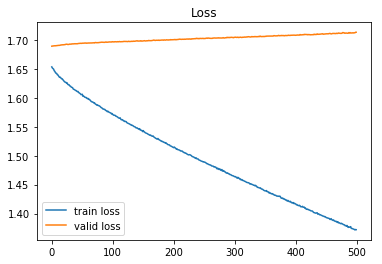

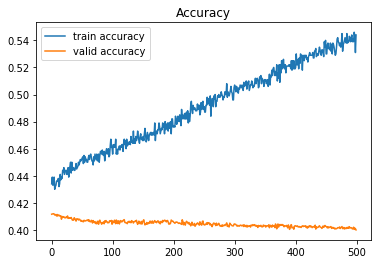

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()